## Blackjack Simulation: Part 1

Welcome to this Jupyter Notebook experiment on simulating a single player hand in the game of Blackjack.

In this notebook, we will focus on simulating (A) the distribution of outcomes on the two cards, and (B) standing on different values (targets ranging from 12 to 21).

Through Python, we aim to gain insights into the probabilities and strategies involved in the game of Blackjack.

This is just the beginning of our exploration (hence the name "Part 1"). In the future, we plan to expand our Monte Carlo simulation to include other factors, such as multiplayer scenarios. Let's dive in and uncover the secrets of Blackjack together!

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Implementation:

In [2]:
class Deck:
    def __init__(self, num_decks=1):
        # Cards as integers, representing the value of the card in the game of blackjack
        _spades = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10 , 10, 10]
        _hearts = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 10, 10, 10]
        _clubs = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 10, 10, 10]
        _diamonds = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 10, 10, 10]

        self.deck = []
        for i in range(num_decks):
            self.deck = _spades + _hearts + _clubs + _diamonds + self.deck
        random.shuffle(self.deck)
    
    def deal(self):
        return self.deck.pop()
    
    def __len__(self):
        return len(self.deck)
    
    def __str__(self):
        return str(self.deck)

In [3]:
class Hand:
    def __init__(self, cards):
        self.cards = cards
        
    def get_value(self):
        # Calculate the value of the hand

        total = sum(self.cards)
        _aces = self.cards.count(11) # temp var, init=no. of aces in the hand
        
        while total > 21 and _aces > 0:
            total -= 10
            _aces -= 1 # Update temp var, decrement no. of aces in hand

        return total

    def hit(self, card):
        self.cards.append(card)

    def __str__(self):
        return str(self.cards)

## Simulation: Dealing the first hand

In [4]:
# Simulation: Dealing the first two cards, no hit, just stand
trials = 500000
values = np.array([])

deck = Deck(6)
for i in range(trials):
    if len(deck) == 0:
        deck = Deck(6)
    my_hand = Hand([deck.deal(), deck.deal()])
    values = np.append(values, my_hand.get_value())

# Descriptive statistics
print("Mean: ", np.mean(values))
print("Median: ", np.median(values))
print("Std: ", np.std(values))
print("Min: ", np.min(values))
print("Max: ", np.max(values))

Mean:  14.55868
Median:  15.0
Std:  4.084915257089185
Min:  4.0
Max:  21.0


In [20]:
prob_X = {} 
for i in range(23):
    prob_X[i] = np.sum(values == i) / trials

# Present data in a table
print("Upon dealing the first two cards:")
df = pd.DataFrame.from_dict(prob_X, orient='index')
df.columns = ['Probability']
df.index.name = 'Value of Hand'
df


Upon dealing the first two cards:


,Probability
Value of Hand,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.005678
5,0.011698
6,0.017864
7,0.023488
8,0.029066


In [6]:
# Validations
PERCISION = 0.001

# _expected_prob = P(10 or face card) and P(Ace) on first two cards drawn
_expected_prob = (4/52*16/51 + 16/52*4/51)
assert abs(prob_X[21] - _expected_prob) < PERCISION, "Probability of 21 is wrong"

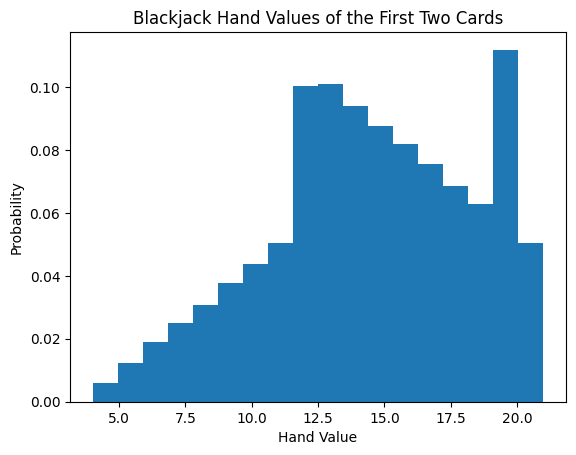

In [21]:
# Plotting: occurrence of hand value upon dealing the first two cards
plt.hist(values, density=True, bins=18)
plt.xlabel("Hand Value")
plt.ylabel("Probability")
plt.title("Blackjack Hand Values of the First Two Cards")
plt.show()

## Simulation: Hitting until reaching certain targets

This section focuses on simulating the strategy of "hitting" in Blackjack to reach target points. Players can choose to "hit" or "stand" based on their hand's total points and strategy.

We will simulate this strategy for different target points (12 to 21) to observe how the game's outcome changes. This involves running multiple rounds of Blackjack simulations and recording the results for analysis.


In [8]:
# Helper function for different types of analysis
def _sim(trials, target_value, do_plot=False):
    # Simulation:
    values = np.array([])

    deck = Deck(6)
    for i in range(trials):
        if len(deck) < 52:
            deck = Deck(6)
        my_hand = Hand([deck.deal(), deck.deal()])
        while my_hand.get_value() < target_value:
            my_hand.hit(deck.deal())
        values = np.append(values, my_hand.get_value())

    if do_plot:
        plt.hist(values, bins=30, density=True)
        plt.show()
        # Descriptive statistics
        print("Mean: ", np.mean(values))
        print("Median: ", np.median(values))
        print("Std: ", np.std(values))
        print("Min: ", np.min(values))
        print("Max: ", np.max(values))

    return values

In [9]:
def analysis2(target_value, do_plot=False):
    trials = 100000
    sim_values = _sim(trials, target_value, do_plot)

    prob_bust = np.sum(sim_values > 21) / trials
    prob_reach_21 = np.sum(sim_values == 21) / trials
    return prob_bust, prob_reach_21

In [10]:
prob_bust_X = np.array([])
prob_reach_21 = np.array([])
lowerbound = 12
upperbound = 22
for i in range(lowerbound, upperbound):
    sims = analysis2(i)
    prob_bust_X = np.append(prob_bust_X, sims[0])
    prob_reach_21 = np.append(prob_reach_21, sims[1]) 


In [11]:
# Present the data in a table
df = pd.DataFrame()
df['Target Value'] = np.arange(lowerbound, upperbound)
df['Probability of busting'] = prob_bust_X
df['Probability of reaching 21'] = prob_reach_21
df

,Target Value,Probability of busting,Probability of reaching 21
0,12,0.00000,0.06871
1,13,0.03309,0.07860
2,14,0.07724,0.08794
3,15,0.13349,0.09669
4,16,0.19994,0.10933
5,17,0.28194,0.11983
6,18,0.37540,0.13152
7,19,0.49357,0.14536
8,20,0.62047,0.15962
9,21,0.82277,0.17723


### If you keep hitting until you reach a target value:

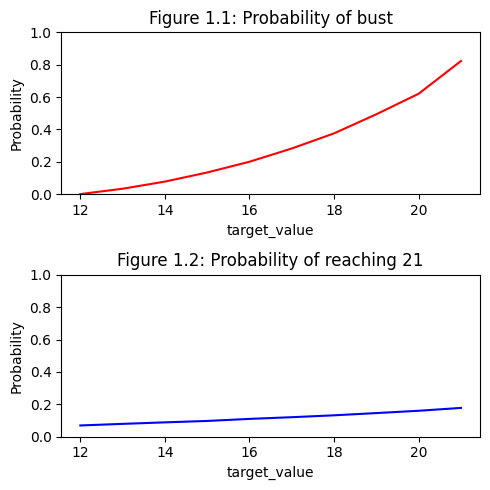

In [12]:
fig, axs = plt.subplots(2, figsize=(5, 5))

# Plot 1.1
axs[0].plot(np.arange(lowerbound, upperbound), prob_bust_X, color='r')
axs[0].set_title("Figure 1.1: Probability of bust")
axs[0].set_xlabel("target_value")
axs[0].set_ylabel("Probability")

# Plot 1.2
axs[1].plot(np.arange(lowerbound, upperbound), prob_reach_21, color='b')
axs[1].set_title("Figure 1.2: Probability of reaching 21")
axs[1].set_xlabel("target_value")
axs[1].set_ylabel("Probability")

# Scale the y-axis to be the same for both plots
axs[0].set_ylim([0, 1])
axs[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

In [16]:
# Present the data in a table
df = pd.DataFrame()
df['Target Value'] = np.arange(lowerbound, upperbound)
df['Probability of busting (Figure 1.1)'] = prob_bust_X
df['Probability of reaching 21 (Figure 1.2)'] = prob_reach_21
df

,Target Value,Probability of busting (Figure 1.1),Probability of reaching 21 (Figure 1.2)
0,12,0.00000,0.06871
1,13,0.03309,0.07860
2,14,0.07724,0.08794
3,15,0.13349,0.09669
4,16,0.19994,0.10933
5,17,0.28194,0.11983
6,18,0.37540,0.13152
7,19,0.49357,0.14536
8,20,0.62047,0.15962
9,21,0.82277,0.17723


Plotting the rate of change of the probabilities:


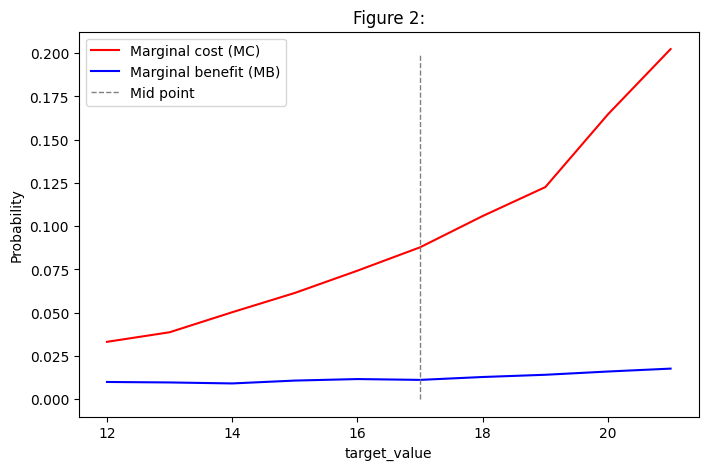

In [13]:
# Plot marginal costs and benefits, costs being the marginal probability of busting, benefits being the marginal probability of reaching 21
plt.figure(figsize=(8, 5)) 
plt.plot(np.arange(lowerbound, upperbound), np.gradient(prob_bust_X), color='r')
plt.plot(np.arange(lowerbound, upperbound), np.gradient(prob_reach_21), color='b')
plt.title("Figure 2:")
plt.xlabel("target_value")
plt.ylabel("Probability")

# Mid point
_mid = (upperbound - lowerbound) // 2 + lowerbound
plt.plot([_mid, _mid], [0, 0.2], linestyle='--', linewidth=1, color='gray')

# Legend
plt.legend(["Marginal cost (MC)", "Marginal benefit (MB)", "Mid point"], loc='upper left')

print("Plotting the rate of change of the probabilities:")
plt.show()

### Observations:
Based on our simulation, we found that the probability of busting increases sharply as the target value in Blackjack gets higher. This suggests a substantial risk of surpassing 21 when aiming for higher target points.

It appears that there is no optimal target value since the MC (marginal cost) and MB (marginal benefit) curves never intersect. Therefore, a reasonable approach would be to select a target value within the middle range. This choice assumes a balance between the risk of busting and the potential to achieve a high total point.

### Conclusions:
- There is no optimal value for a player to stand on, and hitting until reaching 21 is not a sound strategy.

- While there is no foolproof winning strategy, players might still be able to use dominant strategies to minimize losses. This will be explored in Part 2 of this project.